In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

import re
import random
import docx

In [2]:
df=pd.read_excel("Narrative1.xlsx")
df.head()

,ID,MaxDPD,Remainder_310718,Amount_disbursed,Loan_Term_days,DISBDATE,Mortgage amount of open loans (Collateral Amount)_from_Bureau,other_loan_payments_estimate_from_Bureau,BurdenAsOfAplDate_from_Bureau,NumberOfOpenLoans_from_Bureau,NewRepeatedByProd,Age,Income,OpenedLoansInLast45Days_from_Bureau,DPDin30Days_from_Bureau
0,258522817,298,143120.79,200000.0,720,2017-01-10,245140.0,63396.08,1514579.76,3,NEW,47,264150,0,0
1,428523187,507,193403.78,200000.0,720,2017-01-11,0.0,9688.83,131851.00,2,NEW,24,96888,0,0
2,888523426,1,0.00,130000.0,360,2017-01-09,0.0,16956.86,372765.00,2,NEW,24,169568,0,0
3,328523427,539,130000.00,130000.0,360,2017-01-09,503320.0,22906.96,309457.00,2,NEW,30,229069,0,0
4,648523461,239,350517.99,440000.0,720,2017-01-04,0.0,23720.53,788730.00,2,NEW,34,237205,0,0


In [3]:
df.columns

Index(['ID', 'MaxDPD', 'Remainder_310718', 'Amount_disbursed',
       'Loan_Term_days', 'DISBDATE',
       'Mortgage amount of open loans (Collateral Amount)_from_Bureau',
       'other_loan_payments_estimate_from_Bureau',
       'BurdenAsOfAplDate_from_Bureau', 'NumberOfOpenLoans_from_Bureau',
       'NewRepeatedByProd', 'Age', 'Income',
       'OpenedLoansInLast45Days_from_Bureau', 'DPDin30Days_from_Bureau'],
      dtype='object')

In [4]:
newdf=df.copy()

# DPD in 30 Day

In [5]:
dpd_statements={}
dpd_statements["sent_1"]='Considering the DPD in last 30 days, as per the credit bureau, {dpd_y} borrowers had DPD in their repayment and {dpd_n} did not have any DPD while making repayment.'
dpd_statements["sent_2"]="While making the repayments,{dpd_y} borrowers had DPD and {dpd_n} borrowers did not have DPD for DPD in last 30 days."

def dpd(row):
    if row['DPDin30Days_from_Bureau']==0:
        return "No"
    return "Yes"
newdf["DPD in 30 days by Bureau"]=newdf.apply(lambda row:dpd(row),axis=1)

dpd_y=newdf["DPD in 30 days by Bureau"].value_counts().values[0]
dpd_n=newdf["DPD in 30 days by Bureau"].value_counts().values[1]

#random_dpd=random.choice(list(dpd_statements.values()))
#print(random_dpd.format(dpd_y=dpd_y,dpd_n=dpd_n))



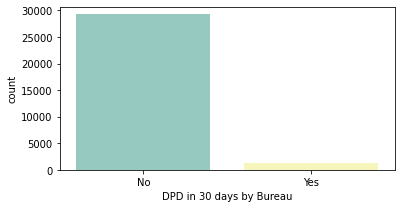

In [6]:
fig=plt.figure(figsize=(6,3))
ax=fig.add_subplot(111)
sns.countplot(newdf["DPD in 30 days by Bureau"],palette="Set3",ax=ax)
plt.ticklabel_format(axis='y',style="plain")
plt.show()

In [7]:
#"Considering the DPD in last 30 days, as per the credit bureau,"+" "+str(df["DPD in 30 days by Bureau"].value_counts().values[0])+" "+"borrowers had DPD in their repayment and"+" "+str(df["DPD in 30 days by Bureau"].value_counts().values[1])+" "+"did not have any DPD while making repayment."

# Open loan last 45 days by Bureau

In [8]:
OpenedLoansInLast45Days={}
OpenedLoansInLast45Days["sent_1"]="Credit bureau records shows us that, in last 45 days {open} number of customers has few loans currently running and {close} customers have closed already."
OpenedLoansInLast45Days["sent_2"]="According to Credit bureau records,{open} number of customers has few loans currently running and {close} customers have closed for last 45 days."

def func(row):
    if row['OpenedLoansInLast45Days_from_Bureau']==0:
        return "No"
    return "Yes"
newdf["Open loan last 45 days by Bureau"]=newdf.apply(lambda row:func(row),axis=1)

run_loans_cust=newdf["Open loan last 45 days by Bureau"].value_counts().values[0]
close_loans_cust=newdf["Open loan last 45 days by Bureau"].value_counts().values[1]

    #random_45_opened_loans=random.choice(list(OpenedLoansInLast45Days.values()))
    #print(random_45_opened_loans.format(open=run_loans_cust,close=close_loans_cust))

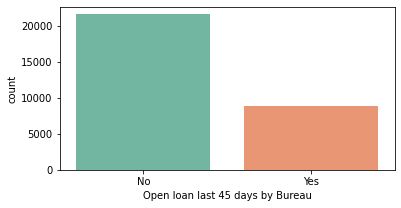

In [9]:
fig=plt.figure(figsize=(6,3))
ax=fig.add_subplot(111)
sns.countplot(newdf["Open loan last 45 days by Bureau"],palette="Set2",ax=ax)
plt.ticklabel_format(axis='y',style="plain")
plt.show()

In [10]:
#"Credit bureau records shows us that, in last 45 days"+" "+str(df["Open loan last 45 days by Bureau"].value_counts().values[0])+" "+"number of customers has few loans currently running and"+" "+str(df["Open loan last 45 days by Bureau"].value_counts().values[1])+" "+ "customers have closed already."

# New/Repeated customers

In [11]:
new_customers = {}
new_customers["sent_1"] = "There are total number of {new_cust} new customers which applied for loan and their loan were disbursed as well."
new_customers["sent_2"] = "{new_cust} new customers applied for loan and their loan were disbursed."

repeat_customers={}
repeat_customers["sent_1"]="Also, we have {repeat_cust} number of customers which are being repeated, meaning they applied for a loan for a multiple times."
repeat_customers["sent_2"]="There are {repeat_cust} number of customers applied for the loan for multiple times."

new_cust=newdf["NewRepeatedByProd"].value_counts().values[0]
repeat_cust=newdf["NewRepeatedByProd"].value_counts().values[1]

#random_new_customers=random.choice(list(new_customers.values()))
#print(random_new_customers.format(new_cust=new_cust))

#random_repeat_customers=random.choice(list(repeat_customers.values()))
#print(random_repeat_customers.format(repeat_cust=repeat_cust))





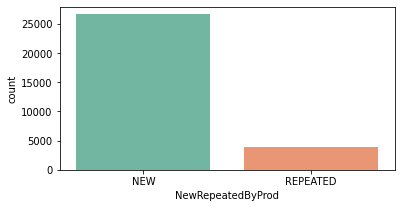

In [12]:
fig=plt.figure(figsize=(6,3))
ax=fig.add_subplot(111)
sns.countplot(newdf["NewRepeatedByProd"],palette="Set2",ax=ax)
plt.ticklabel_format(axis='y',style="plain")
plt.show()

In [13]:
#print("There are total number of"+" "+str(df["NewRepeatedByProd"].value_counts().values[0])+" "+"new customers which applied for loan and their loan were disbursed as well.\nAlso, we have"+" "+str(df["NewRepeatedByProd"].value_counts().values[1])+" "+"number of customers which are being repeated, meaning they applied for a loan for a multiple times.")


# Age

In [14]:
df["Age"].unique()

array([47, 24, 30, 34, 38, 27, 25, 31, 65, 56, 35, 43, 44, 41, 26, 62, 29,
       42, 36, 59, 37, 54, 50, 32, 28, 51, 55, 48, 33, 39, 45, 49, 60, 40,
       23, 46, 64, 57, 52, 58, 61, 53, 63, 66, 22, 67, 69, 68, 21, 19, 20,
       70], dtype=int64)

In [15]:
age={}
age['sent_1']="We have {Young} borrowers which lies in a age group of (18.999, 37.0) and {Old} borrowers which lies in a range of age (37.0, 70.0)."

def funct(row):
    if row["Age"]>=18.99 and row["Age"]<=37.0:
        return "[18.999, 37.0]"
    return "[37.0, 70.0]"
newdf["Age Group"]=newdf.apply(lambda row:funct(row),axis=1)

young=newdf["Age Group"].value_counts().values[0]
old=newdf["Age Group"].value_counts().values[1]

#random_age=random.choice(list(age.values()))
#print(random_age.format(Young=young,Old=old))


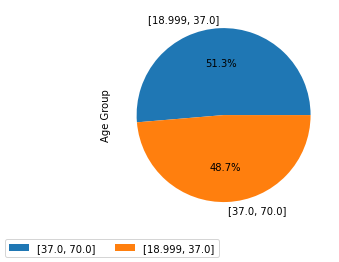

In [16]:
newdf["Age Group"].value_counts().plot(kind="pie",autopct="%1.1f%%")
plt.figlegend(labels=newdf["Age Group"].unique(),loc='lower left',ncol=2,labelspacing=0.)
plt.show()

In [17]:
#"We have"+" "+str(df["Age Group"].value_counts().values[0])+" "+"borrowers which lies in a age group of (18.999, 37.0] and"+" "+str(df["Age Group"].value_counts().values[1])+" "+"borrowers which lies in a range of age (37.0, 70.0]."

# Monthly Basis

In [18]:
newdf['month'] = pd.DatetimeIndex(newdf['DISBDATE']).month

In [19]:
newdf["month"]

0        1
1        1
2        1
3        1
4        1
        ..
30483    6
30484    2
30485    5
30486    6
30487    3
Name: month, Length: 30488, dtype: int64

In [20]:
import datetime

In [21]:

#datetime.datetime.strftime(newdf["DISBDATE"], '%b')

In [22]:
def month_name (df):
    if df["month"] == 1:
        return "Jan"
    elif df["month"] == 2:
        return "Feb"
    elif df["month"] == 3:
        return "Mar"
    elif df["month"] == 4:
        return "Apr"
    elif df["month"] == 5:
        return "May"
    elif df["month"] == 6:
        return "Jun"
    elif df["month"] == 7:
        return "Jul"
    elif df["month"] == 8:
        return "Aug"
    elif df["month"] == 9:
        return "Sep"
    elif df["month"] == 10:
        return "Oct"
    elif df["month"] == 11:
        return "Nov"
    elif df["month"] == 12:
        return "Dec"
    
newdf["Month Name"]=newdf.apply(lambda df:month_name (df),axis=1)

In [23]:
month_max_statements={}
month_max_statements['sent_1']='In the month {maxmonthName}, maximum number of {maxvalue} loan were disbursed.'
month_max_statements['sent_2']='The maximum number of loans were disbursed in the month {maxmonthName} with the count of {maxvalue}.'

month_min_statements={}
month_min_statements['sent_1']="Also, the minimum number of loans were disbursed in the month {minmonthName} with the count of {minvalue}."
month_min_statements['sent_2']="In the month {minmonthName}, minimum number of {minvalue} loan were disbursed."

maxmonthname=newdf["Month Name"].value_counts().index[0]
minmonthname=newdf["Month Name"].value_counts().index[-1]

maxValue=newdf["Month Name"].value_counts().iloc[0]
minValue=newdf["Month Name"].value_counts().iloc[-1]

#random_month_max=random.choice(list(month_max_statements.values()))
#print(random_month_max.format(maxmonthName=maxmonthname,maxvalue=maxValue))

#random_month_min=random.choice(list(month_min_statements.values()))
#print(random_month_min.format(minmonthName=minmonthname,minvalue=minValue))

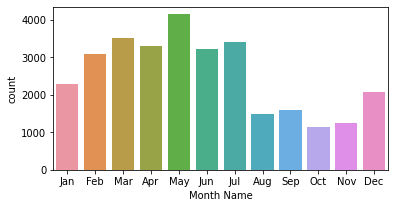

In [24]:
fig=plt.figure(figsize=(6,3))
ax=fig.add_subplot(111)
sns.countplot(newdf["Month Name"],ax=ax)
plt.ticklabel_format(axis='y',style="plain")
plt.show()

In [25]:
#print("In the Month"+" "+str(df["Month Name"].value_counts().idxmax())+" "+"maximum number of"+" "+str(df["Month Name"].value_counts().values.max())+" "+"loan were disbursed.\nAlso minimum number of loans were disbursed in the month"+" "+str(df["Month Name"].value_counts().idxmin())+" "+"with the count of"+" "+str(df["Month Name"].value_counts().values.min()))

# Amount Disbursed

In [26]:
newdf.columns

Index(['ID', 'MaxDPD', 'Remainder_310718', 'Amount_disbursed',
       'Loan_Term_days', 'DISBDATE',
       'Mortgage amount of open loans (Collateral Amount)_from_Bureau',
       'other_loan_payments_estimate_from_Bureau',
       'BurdenAsOfAplDate_from_Bureau', 'NumberOfOpenLoans_from_Bureau',
       'NewRepeatedByProd', 'Age', 'Income',
       'OpenedLoansInLast45Days_from_Bureau', 'DPDin30Days_from_Bureau',
       'DPD in 30 days by Bureau', 'Open loan last 45 days by Bureau',
       'Age Group', 'month', 'Month Name'],
      dtype='object')

In [27]:
month_max_sent={}
month_max_sent['sent_1']='Month {maxmonth} showed the maximum sum of loan disbursed and the sum of it is $ {maxamt}.'
month_max_sent['sent_2']='Talking about the minimum amount of total loan disbursed, it was done in month {maxmonth} with the sum of $ {maxamt}.'

month_min_sent={}
month_min_sent['sent_1']='Talking about the minimum amount of total loan disbursed, it was done in month {minmonth} with the sum of $ {minamt}.'
month_min_sent['sent_2']='Month {minmonth} showed the maximum sum of loan disbursed and the sum of it is $ {minamt}.'

df1=newdf.groupby("Month Name")["Amount_disbursed"].sum().round()
df2=pd.DataFrame(df1)
df2_1=df2.reset_index()
df2_1=df2_1.sort_values("Amount_disbursed",ascending=False)



maxmonth=df2_1.values[0][0]
minmonth=df2_1.values[-1][0]

maxamt=df2_1.values[0][1]
minamt=df2_1.values[-1][1]

#random_month_maxamt=random.choice(list(month_max_sent.values()))
#print(random_month_maxamt.format(maxmonth=maxmonth,maxamt=maxamt))

#random_month_minamt=random.choice(list(month_min_sent.values()))
#print(random_month_minamt.format(minmonth=minmonth,minamt=minamt))


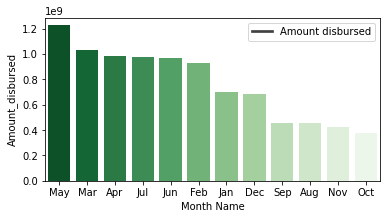

In [28]:
plt.figure(figsize=(6,3))
sns.barplot(df2_1["Month Name"],df2_1["Amount_disbursed"],data=df2_1,palette="Greens_r")
plt.legend(["Amount disbursed"])
plt.show()

In [29]:
#print("Month"+" "+str(df1["Amount_disbursed"].idxmax())+" "+"showed the maximum sum of loan disbursed and the sum of it is $"+" "+str(df1["Amount_disbursed"].values.max())+".\nTalking about the minimum amount of total loan disbursed,it was done in month"+" "+str(df1["Amount_disbursed"].idxmin())+" "+"with the sum of $"+" "+str(df1["Amount_disbursed"].values.min())+".")

# Mortage Amount

In [30]:
Mortage_amt={}
Mortage_amt['sent_1']='There are in total {opened} total loans opened against the mortgage and {close} loans have been closed.'

def mortage(row):
    if row['Mortgage amount of open loans (Collateral Amount)_from_Bureau']==0:
        return "No"
    return "Yes"
newdf["mortage loan open/close"]=newdf.apply(lambda row:mortage(row),axis=1)

opened=newdf["mortage loan open/close"].value_counts().values[0]
close=newdf["mortage loan open/close"].value_counts().values[1]

#random_mortage=random.choice(list(Mortage_amt.values()))
#print(random_mortage.format(opened=opened,close=close))

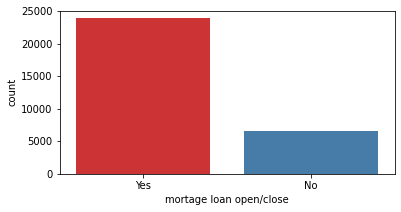

In [31]:
plt.figure(figsize=(6,3))
sns.countplot(newdf["mortage loan open/close"],palette="Set1")
plt.show()

In [32]:
#"There are in total"+" "+str(df["mortage loan open/close"].value_counts().values.max())+" "+"total loans opened against the mortage and"+" "+str(df["mortage loan open/close"].value_counts().values.min())+" "+"loans have been closed." 

# Age Gruops with more than 30 DPD

In [33]:
age_group_statements={}
age_group_statements['sent_1']='Younger group ranging from [18.999, 36.0] has more numbers of customers {Young_g} compare to the elder group and this shows that more young people are likely to delay during repayment and this is because of the lack of experience in credit management.'


age_30dpd_df=newdf.loc[newdf['MaxDPD']>=30]
def age_30dpd(row):
    if row["Age"]>=18.99 and row["Age"]<=36:
        return "[18.999, 36.0]"
    return "[36.0, 69.0]"
age_30dpd_df["Age_Groups"]=age_30dpd_df.apply(lambda row:age_30dpd(row),axis=1)

young_g=age_30dpd_df["Age_Groups"].value_counts().values[0]
old_g=age_30dpd_df["Age_Groups"].value_counts().values[1]
        
#random_age_30dpd=random.choice(list(age_group_statements.values()))
#print(random_age_30dpd.format(Young_g=young_g))


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


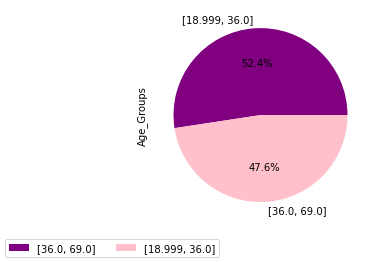

In [34]:
plt.figure(figsize=(7,4))
colors=["purple","pink"]
age_30dpd_df["Age_Groups"].value_counts().plot(kind="pie",autopct="%1.1f%%",colors=colors)
plt.figlegend(labels=age_30dpd_df["Age_Groups"].unique(),loc='lower left',ncol=2,labelspacing=0.)
plt.show()

# New/Repeated customers with more tha 30DPD

In [35]:
new_repeat_customers={}
new_repeat_customers['sent_1']='Going with the fact that new type of customers are more likely to delay during repayment as they had less access to credit system in past or they are newbie to our existing system and the count of {Cust_New} is enough to support our claim.'
new_repeat_customers['sent_2']='The count of new customers with more than 30 DPD is {Cust_New}.These customers are more likely to delay in their repayments may be because of they had less access to the credit system in past and this is enough to support our claim.'

new_repeate_cust_30dpd=newdf.loc[newdf["MaxDPD"]>=30]

cust_new=new_repeate_cust_30dpd["NewRepeatedByProd"].value_counts().values[0]
cust_repeat=new_repeate_cust_30dpd["NewRepeatedByProd"].value_counts().values[1]

#random_new_repeat_cust_30dpd=random.choice(list(new_repeat_customers.values()))
#print(random_new_repeat_cust_30dpd.format(Cust_New=cust_new))


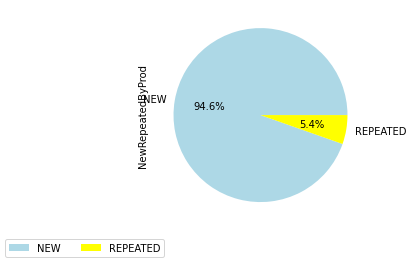

In [36]:
plt.figure(figsize=(7,4))
colors=["lightblue","yellow"]
new_repeate_cust_30dpd["NewRepeatedByProd"].value_counts().plot(kind="pie",autopct="%1.1f%%",colors=colors)
plt.figlegend(labels=new_repeate_cust_30dpd["NewRepeatedByProd"].unique(),loc='lower left',ncol=2,labelspacing=0.)
plt.show()

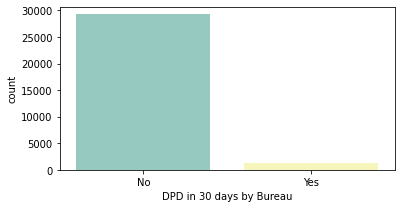

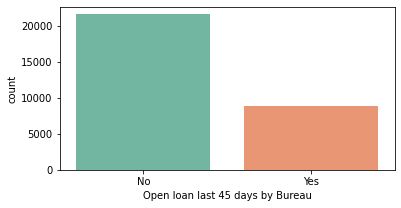

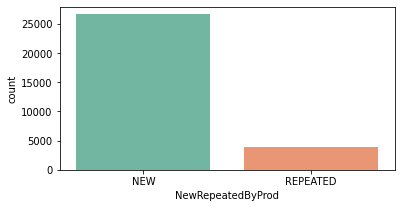

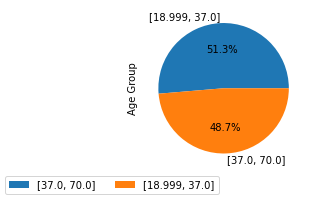

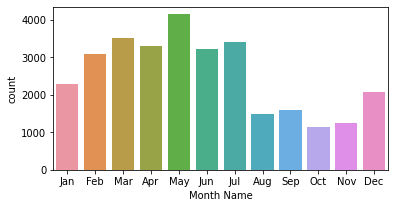

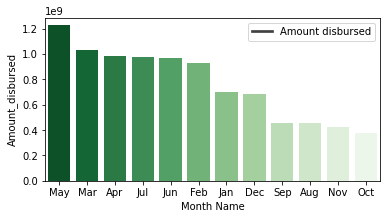

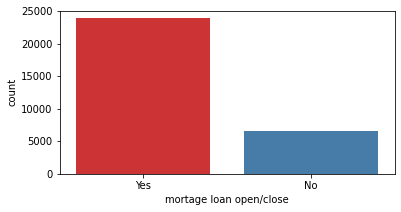

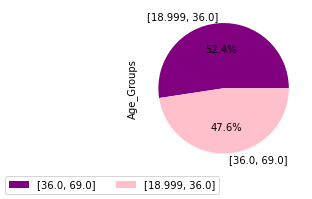

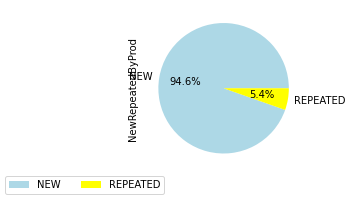

In [37]:
random_dpd=random.choice(list(dpd_statements.values()))
random_dpd_dpd=random_dpd.format(dpd_y=dpd_y,dpd_n=dpd_n)

random_45_opened_loans=random.choice(list(OpenedLoansInLast45Days.values()))
random_45=random_45_opened_loans.format(open=run_loans_cust,close=close_loans_cust)

random_new_customers=random.choice(list(new_customers.values()))
random_new=random_new_customers.format(new_cust=new_cust)

random_repeat_customers=random.choice(list(repeat_customers.values()))
random_repeat=random_repeat_customers.format(repeat_cust=repeat_cust)

random_age=random.choice(list(age.values()))
randomAge=random_age.format(Young=young,Old=old)

random_month_max=random.choice(list(month_max_statements.values()))
randomMMax=random_month_max.format(maxmonthName=maxmonthname,maxvalue=maxValue)

random_month_min=random.choice(list(month_min_statements.values()))
randomMMin=random_month_min.format(minmonthName=minmonthname,minvalue=minValue)

random_month_maxamt=random.choice(list(month_max_sent.values()))
randomMMaxAmt=random_month_maxamt.format(maxmonth=maxmonth,maxamt=maxamt)

random_month_minamt=random.choice(list(month_min_sent.values()))
randomMMinAmt=random_month_minamt.format(minmonth=minmonth,minamt=minamt)

random_mortage=random.choice(list(Mortage_amt.values()))
random_MortageLoan=random_mortage.format(opened=opened,close=close)

random_age_30dpd=random.choice(list(age_group_statements.values()))
random_30dpd_age=random_age_30dpd.format(Young_g=young_g)

random_new_repeat_cust_30dpd=random.choice(list(new_repeat_customers.values()))
random_new_repeat_30dpd=random_new_repeat_cust_30dpd.format(Cust_New=cust_new)


fig=plt.figure(figsize=(6,3))
ax=fig.add_subplot(111)
sns.countplot(newdf["DPD in 30 days by Bureau"],palette="Set3",ax=ax)
plt.ticklabel_format(axis='y',style="plain")
plt.savefig(r'C:\Users\Hp\OneDrive\Documents\NLP IN PYTHON COURSE\Narratives\Narrative1Plot\DPD in 30 days by Bureau.png',bbox_inches='tight',dpi=100,figsize=(6,3))

fig=plt.figure(figsize=(6,3))
ax=fig.add_subplot(111)
sns.countplot(newdf["Open loan last 45 days by Bureau"],palette="Set2",ax=ax)
plt.ticklabel_format(axis='y',style="plain")
plt.savefig(r'C:\Users\Hp\OneDrive\Documents\NLP IN PYTHON COURSE\Narratives\Narrative1Plot\Open loan last 45 days by Bureau.png',bbox_inches='tight',dpi=100,figsize=(6,3))

fig=plt.figure(figsize=(6,3))
ax=fig.add_subplot(111)
sns.countplot(newdf["NewRepeatedByProd"],palette="Set2",ax=ax)
plt.ticklabel_format(axis='y',style="plain")
plt.savefig(r'C:\Users\Hp\OneDrive\Documents\NLP IN PYTHON COURSE\Narratives\Narrative1Plot\New-Repeated.png',bbox_inches='tight',dpi=100,figsize=(6,3))

plt.figure(figsize=(6,3))
newdf["Age Group"].value_counts().plot(kind="pie",autopct="%1.1f%%")
plt.figlegend(labels=newdf["Age Group"].unique(),loc='lower left',ncol=2,labelspacing=0.)
plt.savefig(r'C:\Users\Hp\OneDrive\Documents\NLP IN PYTHON COURSE\Narratives\Narrative1Plot\Age Group.png',bbox_inches='tight',dpi=100,figsize=(6,3))

fig=plt.figure(figsize=(6,3))
ax=fig.add_subplot(111)
sns.countplot(newdf["Month Name"],ax=ax)
plt.ticklabel_format(axis='y',style="plain")
plt.savefig(r'C:\Users\Hp\OneDrive\Documents\NLP IN PYTHON COURSE\Narratives\Narrative1Plot\MonthCust.png',bbox_inches='tight',dpi=100,figsize=(6,3))

plt.figure(figsize=(6,3))
sns.barplot(df2_1["Month Name"],df2_1["Amount_disbursed"],data=df2_1,palette="Greens_r")
plt.legend(["Amount disbursed"])
plt.savefig(r'C:\Users\Hp\OneDrive\Documents\NLP IN PYTHON COURSE\Narratives\Narrative1Plot\Amount Disbursed.png',bbox_inches='tight',dpi=100,figsize=(6,3))

plt.figure(figsize=(6,3))
sns.countplot(newdf["mortage loan open/close"],palette="Set1")
plt.savefig(r'C:\Users\Hp\OneDrive\Documents\NLP IN PYTHON COURSE\Narratives\Narrative1Plot\Mortage loan open-close.png',bbox_inches='tight',dpi=100,figsize=(6,3))


plt.figure(figsize=(6,3))
colors=["purple","pink"]
age_30dpd_df["Age_Groups"].value_counts().plot(kind="pie",autopct="%1.1f%%",colors=colors)
plt.figlegend(labels=age_30dpd_df["Age_Groups"].unique(),loc='lower left',ncol=2,labelspacing=0.)
plt.savefig(r'C:\Users\Hp\OneDrive\Documents\NLP IN PYTHON COURSE\Narratives\Narrative1Plot\Age Groups with more than 30dpd.png',bbox_inches='tight',dpi=100,figsize=(6,3))


plt.figure(figsize=(6,3))
colors=["lightblue","yellow"]
new_repeate_cust_30dpd["NewRepeatedByProd"].value_counts().plot(kind="pie",autopct="%1.1f%%",colors=colors)
plt.figlegend(labels=new_repeate_cust_30dpd["NewRepeatedByProd"].unique(),loc='lower left',ncol=2,labelspacing=0.)
plt.savefig(r'C:\Users\Hp\OneDrive\Documents\NLP IN PYTHON COURSE\Narratives\Narrative1Plot\New-Repeated customers with more than 30dpd.png',bbox_inches='tight',dpi=100,figsize=(6,3))






In [38]:
doc = docx.Document() 

# add a heading of level 0 (largest heading) 
doc.add_heading('Narratives and Graphs', 0)

doc_para1 = doc.add_paragraph(random_dpd_dpd,style='List Bullet')
doc_para1.add_run().bold = True
doc.add_picture(r'C:\Users\Hp\OneDrive\Documents\NLP IN PYTHON COURSE\Narratives\Narrative1Plot\DPD in 30 days by Bureau.png')

doc_para2 = doc.add_paragraph(random_45,style='List Bullet')
doc_para2.add_run().bold = True
doc.add_picture(r'C:\Users\Hp\OneDrive\Documents\NLP IN PYTHON COURSE\Narratives\Narrative1Plot\Open loan last 45 days by Bureau.png') 

doc.add_page_break()

doc_para3 = doc.add_paragraph(random_new,style='List Bullet')
doc_para3.add_run().bold = True

doc_para4 = doc.add_paragraph(random_repeat,style='List Bullet')
doc_para4.add_run().bold = True
doc.add_picture(r'C:\Users\Hp\OneDrive\Documents\NLP IN PYTHON COURSE\Narratives\Narrative1Plot\New-Repeated.png')

doc_para5 = doc.add_paragraph(randomAge,style='List Bullet')
doc_para5.add_run().bold = True
doc.add_picture(r'C:\Users\Hp\OneDrive\Documents\NLP IN PYTHON COURSE\Narratives\Narrative1Plot\Age Group.png')

doc.add_page_break()

doc_para6 = doc.add_paragraph(randomMMax,style='List Bullet')
doc_para6.add_run().bold = True

doc_para7 = doc.add_paragraph(randomMMin,style='List Bullet')
doc_para7.add_run().bold = True
doc.add_picture(r'C:\Users\Hp\OneDrive\Documents\NLP IN PYTHON COURSE\Narratives\Narrative1Plot\MonthCust.png')
doc.add_page_break()

doc_para8 = doc.add_paragraph(randomMMaxAmt,style='List Bullet')
doc_para8.add_run().bold = True
doc_para9 = doc.add_paragraph(randomMMinAmt,style='List Bullet')
doc_para9.add_run().bold = True

doc.add_picture(r'C:\Users\Hp\OneDrive\Documents\NLP IN PYTHON COURSE\Narratives\Narrative1Plot\Amount Disbursed.png')

doc.add_page_break()

doc_para10 = doc.add_paragraph(random_MortageLoan,style='List Bullet')
doc_para10.add_run().bold = True
doc.add_picture(r'C:\Users\Hp\OneDrive\Documents\NLP IN PYTHON COURSE\Narratives\Narrative1Plot\Mortage loan open-close.png')

doc.add_page_break()

doc_para11 = doc.add_paragraph(random_30dpd_age,style='List Bullet')
doc_para11.add_run().bold = True
doc.add_picture(r'C:\Users\Hp\OneDrive\Documents\NLP IN PYTHON COURSE\Narratives\Narrative1Plot\Age Groups with more than 30dpd.png')

doc_para12 = doc.add_paragraph(random_new_repeat_30dpd,style='List Bullet')
doc_para12.add_run().bold = True
doc.add_picture(r'C:\Users\Hp\OneDrive\Documents\NLP IN PYTHON COURSE\Narratives\Narrative1Plot\New-Repeated customers with more than 30dpd.png')



doc.save(r'C:\Users\Hp\OneDrive\Documents\NLP IN PYTHON COURSE\Narratives\Narrative1Plot\test.docx') 
